In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

23782


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
23777,2021-05-31,47,沖縄県,142,17044,2,150
23778,2021-06-01,47,沖縄県,223,17267,1,151
23779,2021-06-02,47,沖縄県,297,17564,1,152
23780,2021-06-03,47,沖縄県,244,17808,1,153
23781,2021-06-04,47,沖縄県,247,18055,0,153


In [3]:
latest_date = pref["日付"].max().strftime("%Y-%m-%d")

In [4]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,11132,8551,138
43,香川県,18722,2026,26
44,高知県,19734,1553,21
45,鳥取県,15686,466,2
46,鹿児島県,23276,3435,30


## 都道府県ごとの最新データを付与

In [5]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
23775,2021-05-29,47,沖縄県,335,16631,0,148,1706.0
23776,2021-05-30,47,沖縄県,271,16902,0,148,1821.0
23777,2021-05-31,47,沖縄県,142,17044,2,150,1859.0
23778,2021-06-01,47,沖縄県,223,17267,1,151,1826.0
23779,2021-06-02,47,沖縄県,297,17564,1,152,1821.0
23780,2021-06-03,47,沖縄県,244,17808,1,153,1825.0
23781,2021-06-04,47,沖縄県,247,18055,0,153,1759.0


### 感染者数前日比

In [6]:
import numpy as np
pref["新規感染者数前日比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change()
# 一番古い日付だけNANを設定
pref.loc[pref["日付"]==pref["日付"].min(),"新規感染者数前日比"] = np.nan
pref["直近1週間の新規感染者数前日比平均"] = pref["新規感染者数前日比"].rolling(7).mean()
pref.tail()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
23777,2021-05-31,47,沖縄県,142,17044,2,150,1859.0,-0.476015,0.163332
23778,2021-06-01,47,沖縄県,223,17267,1,151,1826.0,0.570423,0.036030
23779,2021-06-02,47,沖縄県,297,17564,1,152,1821.0,0.331839,0.057765
23780,2021-06-03,47,沖縄県,244,17808,1,153,1825.0,-0.178451,0.061601
23781,2021-06-04,47,沖縄県,247,18055,0,153,1759.0,0.012295,0.019905


In [7]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数","新規感染者数前日比","直近1週間の新規感染者数前日比平均"]]
latest.head()

,都道府県名,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
505,北海道,2083.0,-0.323333,-0.079041
1011,青森県,91.0,0.300000,1.311423
1517,岩手県,74.0,0.285714,0.209380
2023,宮城県,126.0,0.200000,0.458709
2529,秋田県,5.0,-1.000000,NaN


In [8]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
0,三重県,12144,5010,107,175.0,0.000000,-0.004499
1,京都府,13156,16007,219,321.0,-0.043478,0.137908
2,佐賀県,20746,2524,21,46.0,-0.166667,0.250850
3,兵庫県,14168,40064,1211,585.0,0.071429,0.269774
4,北海道,506,39033,1163,2083.0,-0.323333,-0.079041


## 人口データを付与

In [9]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [10]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口
0,三重県,12144,5010,107,175.0,0.000000,-0.004499,1813859
1,京都府,13156,16007,219,321.0,-0.043478,0.137908,2545899
2,佐賀県,20746,2524,21,46.0,-0.166667,0.250850,823810
3,兵庫県,14168,40064,1211,585.0,0.071429,0.269774,5549568
4,北海道,506,39033,1163,2083.0,-0.323333,-0.079041,5267762


## 人口当たりの感染者数

In [11]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,506,39033,1163,2083.0,-0.323333,-0.079041,5267762,74.097881,740.978807,39.542409
41,青森県,1012,2406,30,91.0,0.300000,1.311423,1275783,18.859007,188.590066,7.132874
19,岩手県,1518,1481,45,74.0,0.285714,0.209380,1235517,11.986885,119.868848,5.989396
11,宮城県,2024,8949,83,126.0,0.200000,0.458709,2292385,39.037945,390.379452,5.496459
36,秋田県,2530,760,16,5.0,-1.000000,NaN,985416,7.712479,77.124788,0.507400
15,山形県,3036,1983,43,43.0,-0.285714,0.038946,1082296,18.322160,183.221596,3.973035
35,福島県,3542,4623,149,81.0,0.100000,0.137302,1881981,24.564541,245.645413,4.303975
38,茨城県,4048,9864,152,224.0,1.045455,0.128880,2921436,33.764217,337.642173,7.667462
27,栃木県,4554,6450,78,172.0,-0.080000,0.031906,1965516,32.815810,328.158102,8.750883
37,群馬県,5060,7902,140,139.0,0.277778,0.094176,1969439,40.123101,401.231010,7.057847


## 感染者数

### 平均値、中央値

In [12]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      16057.170213
std       29472.197820
min         466.000000
25%        2465.000000
50%        4849.000000
75%       10394.500000
max      162893.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [13]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6578,162893,2095,3185.0,-0.070866,0.015306,13834925,117.740429,1177.404287,23.021448
1,大阪府,13662,100546,2404,1340.0,-0.163717,0.023195,8849635,113.615985,1136.159853,15.141867
2,神奈川県,7084,62341,908,1456.0,0.088372,0.011649,9209442,67.692483,676.924834,15.809861
3,愛知県,11638,48435,832,1942.0,-0.076389,0.033457,7575530,63.936121,639.361206,25.635170
4,埼玉県,5566,44244,797,814.0,-0.163934,0.061738,7390054,59.869657,598.696572,11.014804
5,兵庫県,14168,40064,1211,585.0,0.071429,0.269774,5549568,72.193007,721.930067,10.541361
6,北海道,506,39033,1163,2083.0,-0.323333,-0.079041,5267762,74.097881,740.978807,39.542409
7,千葉県,6072,37523,689,674.0,0.222222,0.043279,6319772,59.373977,593.739774,10.664942
8,福岡県,20240,34480,476,784.0,-0.225490,-0.064527,5129841,67.214559,672.145589,15.283125
9,沖縄県,23782,18055,153,1759.0,0.012295,0.019905,1481547,121.865860,1218.658605,118.727249


## １万人あたりの感染者数

### 平均値、中央値

In [14]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      38.589737
std       27.616153
min        7.712479
25%       20.859117
50%       29.742128
75%       50.820831
max      121.865860
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [15]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
28,沖縄県,23782,18055,153,1759.0,0.012295,0.019905,1481547,121.865860,1218.658605,118.727249
4,北海道,506,39033,1163,2083.0,-0.323333,-0.079041,5267762,74.097881,740.978807,39.542409
24,愛知県,11638,48435,832,1942.0,-0.076389,0.033457,7575530,63.936121,639.361206,25.635170
26,東京都,6578,162893,2095,3185.0,-0.070866,0.015306,13834925,117.740429,1177.404287,23.021448
44,高知県,19734,1553,21,155.0,-0.263158,-0.048928,709230,21.896987,218.969869,21.854687
17,岐阜県,10626,8863,167,408.0,-0.521127,-0.021848,2032490,43.606611,436.066106,20.073900
29,滋賀県,12650,5247,81,259.0,0.108108,0.004723,1420948,36.926052,369.260522,18.227268
21,広島県,17204,10925,143,484.0,0.035088,-0.080898,2826858,38.647148,386.471482,17.121483
32,神奈川県,7084,62341,908,1456.0,0.088372,0.011649,9209442,67.692483,676.924834,15.809861
34,福岡県,20240,34480,476,784.0,-0.225490,-0.064527,5129841,67.214559,672.145589,15.283125


## 直近１週間の新規感染者 増加速度

## 増加速度 統計情報

In [16]:
all_jp["直近1週間の新規感染者数前日比平均"].describe()

count    42.000000
mean      0.165565
std       0.426095
min      -0.098545
25%      -0.004535
50%       0.039921
75%       0.137756
max       2.380112
Name: 直近1週間の新規感染者数前日比平均, dtype: float64

### WORST 10(増加速度の早い順)

In [17]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
6,和歌山県,15180,2633,45,38.0,-1.000000,2.380112,954258,27.592119,275.921187,3.982152
41,青森県,1012,2406,30,91.0,0.300000,1.311423,1275783,18.859007,188.590066,7.132874
39,長崎県,21252,2950,68,86.0,-0.111111,0.585461,1350769,21.839411,218.394115,6.366744
11,宮城県,2024,8949,83,126.0,0.200000,0.458709,2292385,39.037945,390.379452,5.496459
23,愛媛県,19228,2723,74,24.0,0.000000,0.386735,1369131,19.888528,198.885278,1.752937
12,宮崎県,22770,3039,26,26.0,-0.200000,0.320841,1095903,27.730556,277.305564,2.372473
3,兵庫県,14168,40064,1211,585.0,0.071429,0.269774,5549568,72.193007,721.930067,10.541361
2,佐賀県,20746,2524,21,46.0,-0.166667,0.250850,823810,30.638133,306.381326,5.583812
16,山梨県,9614,1597,19,64.0,1.625000,0.238915,826579,19.320597,193.205973,7.742757
19,岩手県,1518,1481,45,74.0,0.285714,0.209380,1235517,11.986885,119.868848,5.989396


### BEST 10(増加速度の遅い順／減少速度の速い順)

In [18]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
18,岡山県,16698,7444,109,200.0,-0.483871,-0.098545,1903627,39.104299,391.042993,10.506260
8,大分県,22264,3424,55,115.0,-0.666667,-0.094645,1151229,29.742128,297.421278,9.989324
31,石川県,8602,3810,108,119.0,0.222222,-0.088445,1139612,33.432431,334.324314,10.442150
21,広島県,17204,10925,143,484.0,0.035088,-0.080898,2826858,38.647148,386.471482,17.121483
4,北海道,506,39033,1163,2083.0,-0.323333,-0.079041,5267762,74.097881,740.978807,39.542409
43,香川県,18722,2026,26,44.0,-0.666667,-0.070068,981280,20.646503,206.465025,4.483939
34,福岡県,20240,34480,476,784.0,-0.225490,-0.064527,5129841,67.214559,672.145589,15.283125
44,高知県,19734,1553,21,155.0,-0.263158,-0.048928,709230,21.896987,218.969869,21.854687
42,静岡県,11132,8551,138,290.0,-0.227273,-0.035017,3708556,23.057492,230.574919,7.819755
17,岐阜県,10626,8863,167,408.0,-0.521127,-0.021848,2032490,43.606611,436.066106,20.073900


## グラフ化

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [20]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


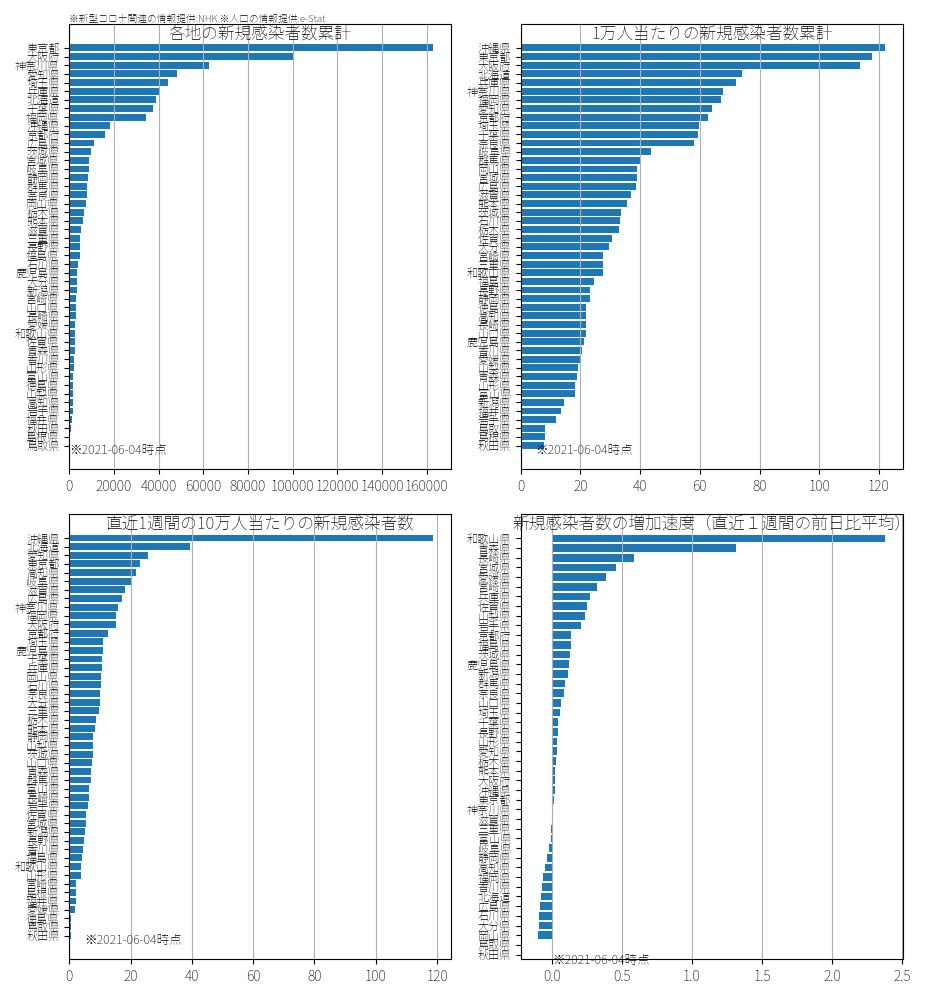

In [43]:
fig = plt.figure(figsize=(9.5,10))
plt.subplot(2,2,1) # (rows, columns, panel number)
plt.text(0,49,"※新型コロナ関連の情報提供:NHK ※人口の情報提供:e-Stat",fontsize=7)
plt.title("各地の新規感染者数累計",y=0.95)
#plt.xticks(rotation="70",fontsize=9)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["各地の感染者数合計"])
#plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.barh(chart_data["都道府県名"],chart_data["各地の感染者数合計"],align="center")
#plt.title("各地の感染者数", y=0.9)
plt.text(5,-1,"※{}時点".format(latest_date),fontsize=9)

plt.subplot(2,2,2) # (rows, columns, panel number)
plt.title("1万人当たりの新規感染者数累計", y=0.95)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["１万人当たりの感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["１万人当たりの感染者数"])
plt.text(5,-1,"※{}時点".format(latest_date),fontsize=9)

plt.subplot(2,2,3) # (rows, columns, panel number)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの新規感染者数",y=0.95)
# plt.text(0,chart_data["都道府県名"][-1],"{}時点".format(latest_date))
plt.text(5,-1,"※{}時点".format(latest_date),fontsize=9)

### 新規感染者数の増加速度（直近１週間の前日比平均）
plt.subplot(2,2,4) # (rows, columns, panel number)
chart_data = all_jp.sort_values("直近1週間の新規感染者数前日比平均",na_position="first")
plt.yticks(fontsize=8)
plt.grid(axis="x")
plt.barh(chart_data["都道府県名"], chart_data["直近1週間の新規感染者数前日比平均"])
plt.title("新規感染者数の増加速度（直近１週間の前日比平均）",y=0.95)
plt.text(0,2,"※{}時点".format(latest_date),fontsize=9)


fig.tight_layout()


In [44]:
fig.savefig("out/covid-domestic.png")

## 度数分布表

In [23]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   466.     20769.375  41072.75   61376.125  81679.5   101982.875
 122286.25  142589.625 162893.   ]


## ヒストグラム

<IPython.core.display.Javascript object>


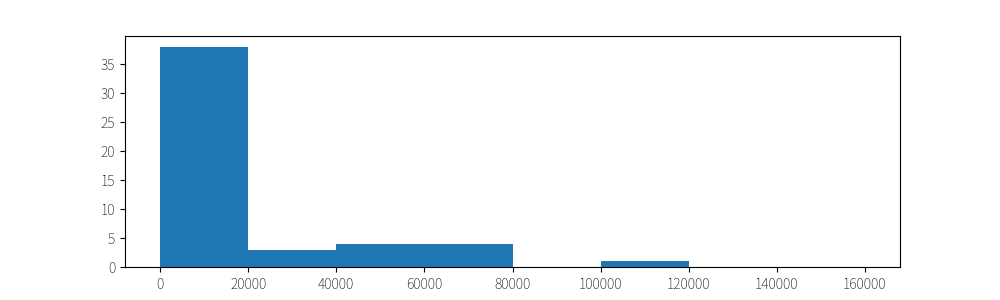

(array([38.,  3.,  4.,  0.,  1.,  0.,  0.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [24]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


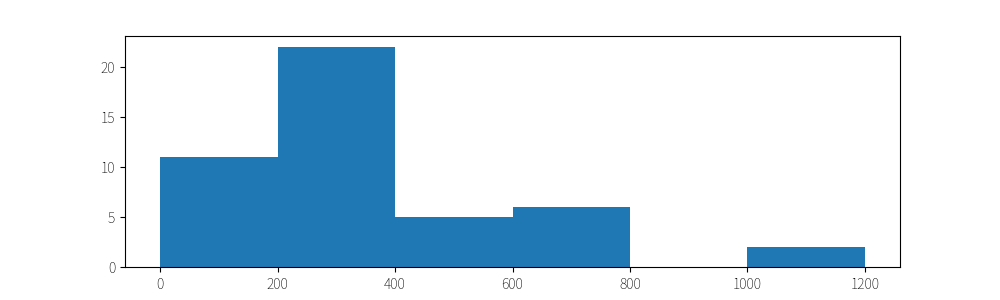

(array([11., 22.,  5.,  6.,  0.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [25]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
